In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
train=pd.read_csv('flight_train.csv')
train=pd.DataFrame(train)                    # to read the train file we use this command

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_csv('flight_test.csv')                       # to read the test file we use this command
test=pd.DataFrame(test)

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
test.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Keys command is use to get the details of column names present in the data set.

In [8]:
train.shape

(10683, 11)

In [9]:
test.shape

(2671, 10)

We have the information of the dimension of data we will be handelling. We have 10683 rows and 11 columns in the train data and 2671 rows and 10 columns in test data.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We observe the information of data like the name of columns type of data integer or object, memory usage of the data.
here we observe that the test data has object data type, with 10 columns. In train data set we observe that we have 10 columns of object data and 1 column of integer data, here we have total 11 columns.

In [12]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

We have missing data in Route and Total_Stops of train data.

In [14]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [15]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


We get the details of the data set like the count the mean, minimum, standared and max along with unique,top and frequency.

# EDA

In [16]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

We observe that there are total 12 airlines that are providing service.

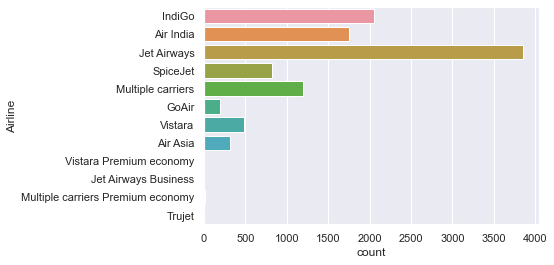

In [17]:
sns.countplot(y='Airline', data= train)

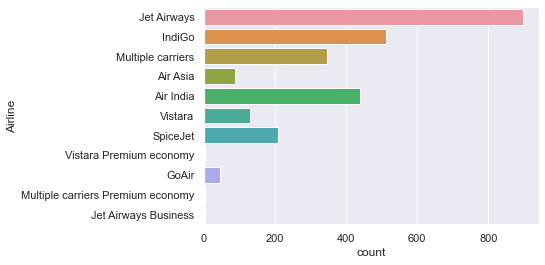

In [18]:
sns.countplot(y='Airline', data= test)

Above is the graphical representation of Airline data count. We observe that Jet airways has highest count in bot train and test data.

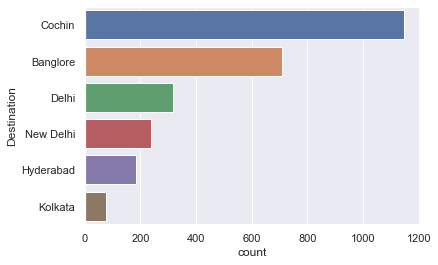

In [19]:
sns.countplot(y='Destination', data= test)

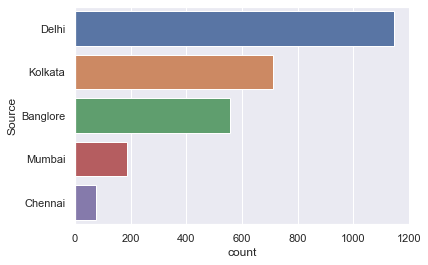

In [20]:
sns.countplot(y='Source', data= test)

In [21]:
train['Route'].isnull().sum()

1

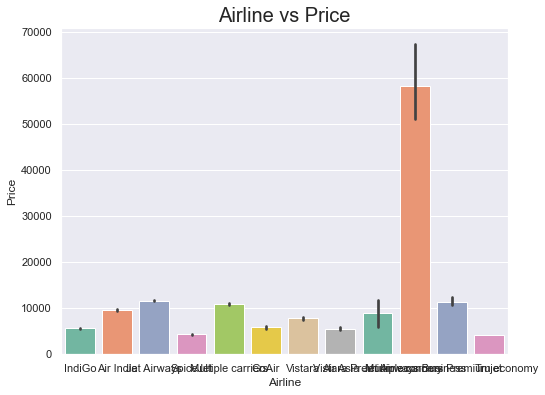

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(train['Airline'], train['Price'], palette='Set2')
plt.title('Airline vs Price', size=20)
plt.show()

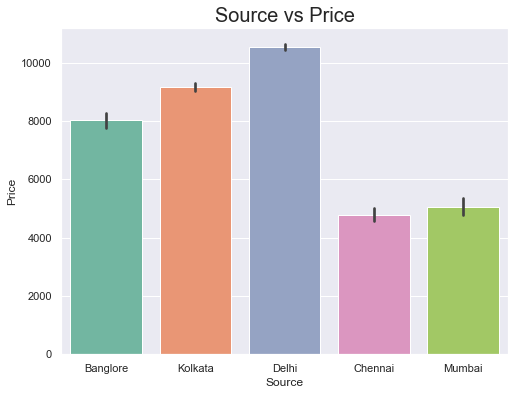

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(train['Source'], train['Price'], palette='Set2')
plt.title('Source vs Price', size=20)
plt.show()

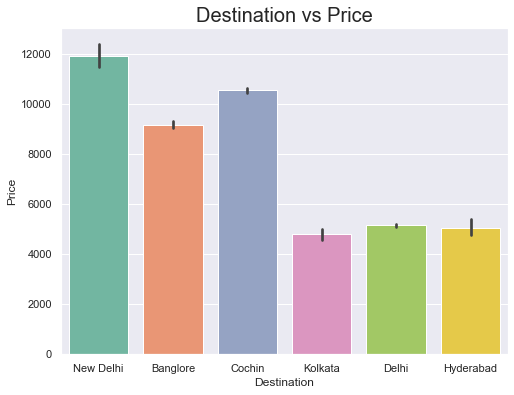

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(train['Destination'], train['Price'], palette='Set2')
plt.title('Destination vs Price', size=20)
plt.show()

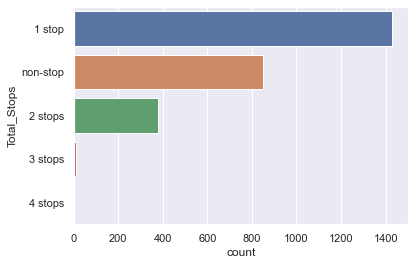

In [25]:
sns.countplot(y='Total_Stops', data= test)

In [26]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [28]:
# We will convert hours in minutes in Duration column first


train['Duration']=  train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']=  test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [29]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [30]:
# Spliting the date of journy in days and months

train["Day"] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train["Month"] = train['Date_of_Journey'].str.split('/').str[1].astype(int)

#Droping the Date of Journy column 
train.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [31]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [32]:
# Spliting the date of journy in days and months

test["Day"] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test["Month"] = test['Date_of_Journey'].str.split('/').str[1].astype(int)

#Droping the Date of Journy column 
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [33]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info,24,6


We have created two new columns Day and Month. Post that droped the Date_of_Journey column from train and test data set.

In [34]:
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

In [35]:
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute



We are fetching the hours and minutes from the Dep time and creating seperate column for them.

In [36]:
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [37]:
test.drop(["Dep_Time"], axis = 1, inplace = True)

We are droping the Dep_Time column as we have created seperate two columns for hours and minute

In [38]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50


In [39]:
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,655,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,240,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1425,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,780,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,170,non-stop,No info,24,6,23,55


In [40]:

train["Arr_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour
train["Arr_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

test["Arr_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arr_min"] = pd.to_datetime(test.Arrival_Time).dt.minute



We are similarly creating the two columns of Arr hours and Arr minutes for both train and test data

Post that we are removing or dropping the columns of Arrival time shown below

In [41]:

train.drop(["Arrival_Time"], axis = 1, inplace = True)
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [42]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


We are removing the punctutation from train and test

In [43]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
train.apply(remove_punctuation)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR DEL,170,nonstop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU IXR BBI BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL LKO BOM COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU NAG BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR NAG DEL,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU BLR,150,nonstop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU BLR,155,nonstop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR DEL,180,nonstop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR DEL,160,nonstop,No info,12648,1,3,11,30,14,10


In [44]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s ]','')
    except:
            pass
    return x
test.apply(remove_punctuation)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,DEL BOM COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU MAA BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL BOM COK,1425,1 stop,Inflight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL BOM COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR DEL,170,nonstop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU DEL BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU BLR,155,nonstop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL BOM COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL BOM COK,915,1 stop,No info,6,3,4,0,19,15


In [45]:
train=train.apply(remove_punctuation).fillna(0)
train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR DEL,170,nonstop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU IXR BBI BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL LKO BOM COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU NAG BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR NAG DEL,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU BLR,150,nonstop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU BLR,155,nonstop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR DEL,180,nonstop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR DEL,160,nonstop,No info,12648,1,3,11,30,14,10


In [46]:
test=test.apply(remove_punctuation).fillna(0)
test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,DEL BOM COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU MAA BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL BOM COK,1425,1 stop,Inflight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL BOM COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR DEL,170,nonstop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU DEL BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU BLR,155,nonstop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL BOM COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL BOM COK,915,1 stop,No info,6,3,4,0,19,15


In [47]:
train.replace({"nonstop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test.replace({"nonstop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

We have replaced the  key words with numerical values

In [48]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
var_mod = ['Airline','Source','Destination','Additional_Info']

for i in var_mod:
    train[i] = LE.fit_transform(train[i])
    
for i in var_mod:
    test[i] = LE.fit_transform(test[i])

In [49]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,BLR DEL,170,0,8,3897,24,3,22,20,1,10
1,1,3,0,CCU IXR BBI BLR,445,2,8,7662,1,5,5,50,13,15
2,4,2,1,DEL LKO BOM COK,1140,2,8,13882,9,6,9,25,4,25
3,3,3,0,CCU NAG BLR,325,1,8,6218,12,5,18,5,23,30
4,3,0,5,BLR NAG DEL,285,1,8,13302,1,3,16,50,21,35


In [50]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,2,1,DEL BOM COK,655,1,5,6,6,17,30,4,25
1,3,3,0,CCU MAA BLR,240,1,5,12,5,6,20,10,20
2,4,2,1,DEL BOM COK,1425,1,3,21,5,19,15,19,0
3,6,2,1,DEL BOM COK,780,1,5,21,5,8,0,21,0
4,0,0,2,BLR DEL,170,0,5,24,6,23,55,2,45


In [51]:
train["Route"].value_counts()

DEL  BOM  COK         2376
BLR  DEL              1552
CCU  BOM  BLR          979
CCU  BLR               724
BOM  HYD               621
                      ... 
CCU  IXB  DEL  BLR       1
BLR  BOM  IXC  DEL       1
BOM  GOI  HYD            1
BOM  VNS  DEL  HYD       1
0                        1
Name: Route, Length: 129, dtype: int64

In [52]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,2,1,DEL BOM COK,655,1,5,6,6,17,30,4,25
1,3,3,0,CCU MAA BLR,240,1,5,12,5,6,20,10,20
2,4,2,1,DEL BOM COK,1425,1,3,21,5,19,15,19,0
3,6,2,1,DEL BOM COK,780,1,5,21,5,8,0,21,0
4,0,0,2,BLR DEL,170,0,5,24,6,23,55,2,45


In [53]:
train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Dep_hour           0
Dep_min            0
Arr_hour           0
Arr_min            0
dtype: int64

In [54]:
train.describe()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,643.093232,0.824113,7.393054,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630
std,2.352155,1.177221,1.474782,507.862001,0.675244,1.214211,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,520.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,930.000000,1.000000,8.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,2860.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [55]:
train["Route"].value_counts()

DEL  BOM  COK         2376
BLR  DEL              1552
CCU  BOM  BLR          979
CCU  BLR               724
BOM  HYD               621
                      ... 
CCU  IXB  DEL  BLR       1
BLR  BOM  IXC  DEL       1
BOM  GOI  HYD            1
BOM  VNS  DEL  HYD       1
0                        1
Name: Route, Length: 129, dtype: int64

In [56]:
train.drop(["Route"],axis =1, inplace=True)
test.drop(["Route"],axis =1, inplace=True)     # we are dropping the Route columns here as it is not needed.


In [57]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,170,0,8,3897,24,3,22,20,1,10
1,1,3,0,445,2,8,7662,1,5,5,50,13,15
2,4,2,1,1140,2,8,13882,9,6,9,25,4,25
3,3,3,0,325,1,8,6218,12,5,18,5,23,30
4,3,0,5,285,1,8,13302,1,3,16,50,21,35


In [58]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,2,1,655,1,5,6,6,17,30,4,25
1,3,3,0,240,1,5,12,5,6,20,10,20
2,4,2,1,1425,1,3,21,5,19,15,19,0
3,6,2,1,780,1,5,21,5,8,0,21,0
4,0,0,2,170,0,5,24,6,23,55,2,45


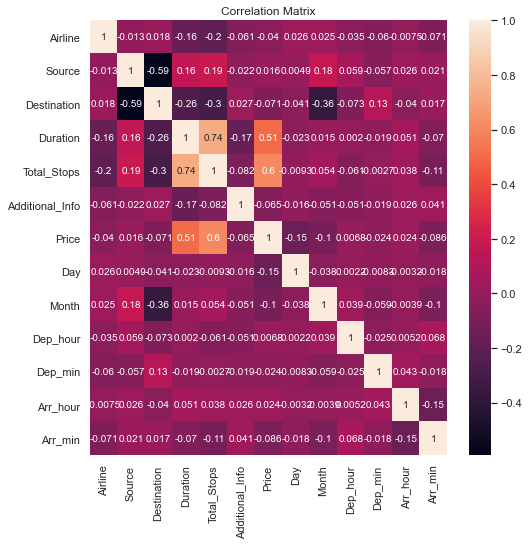

In [59]:
corr_mat=train.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

We observe from the co-relation matrix that the prices are directly proporatioanl to Duration and toatl stops, also signification realtionship with Arrival and departure time.

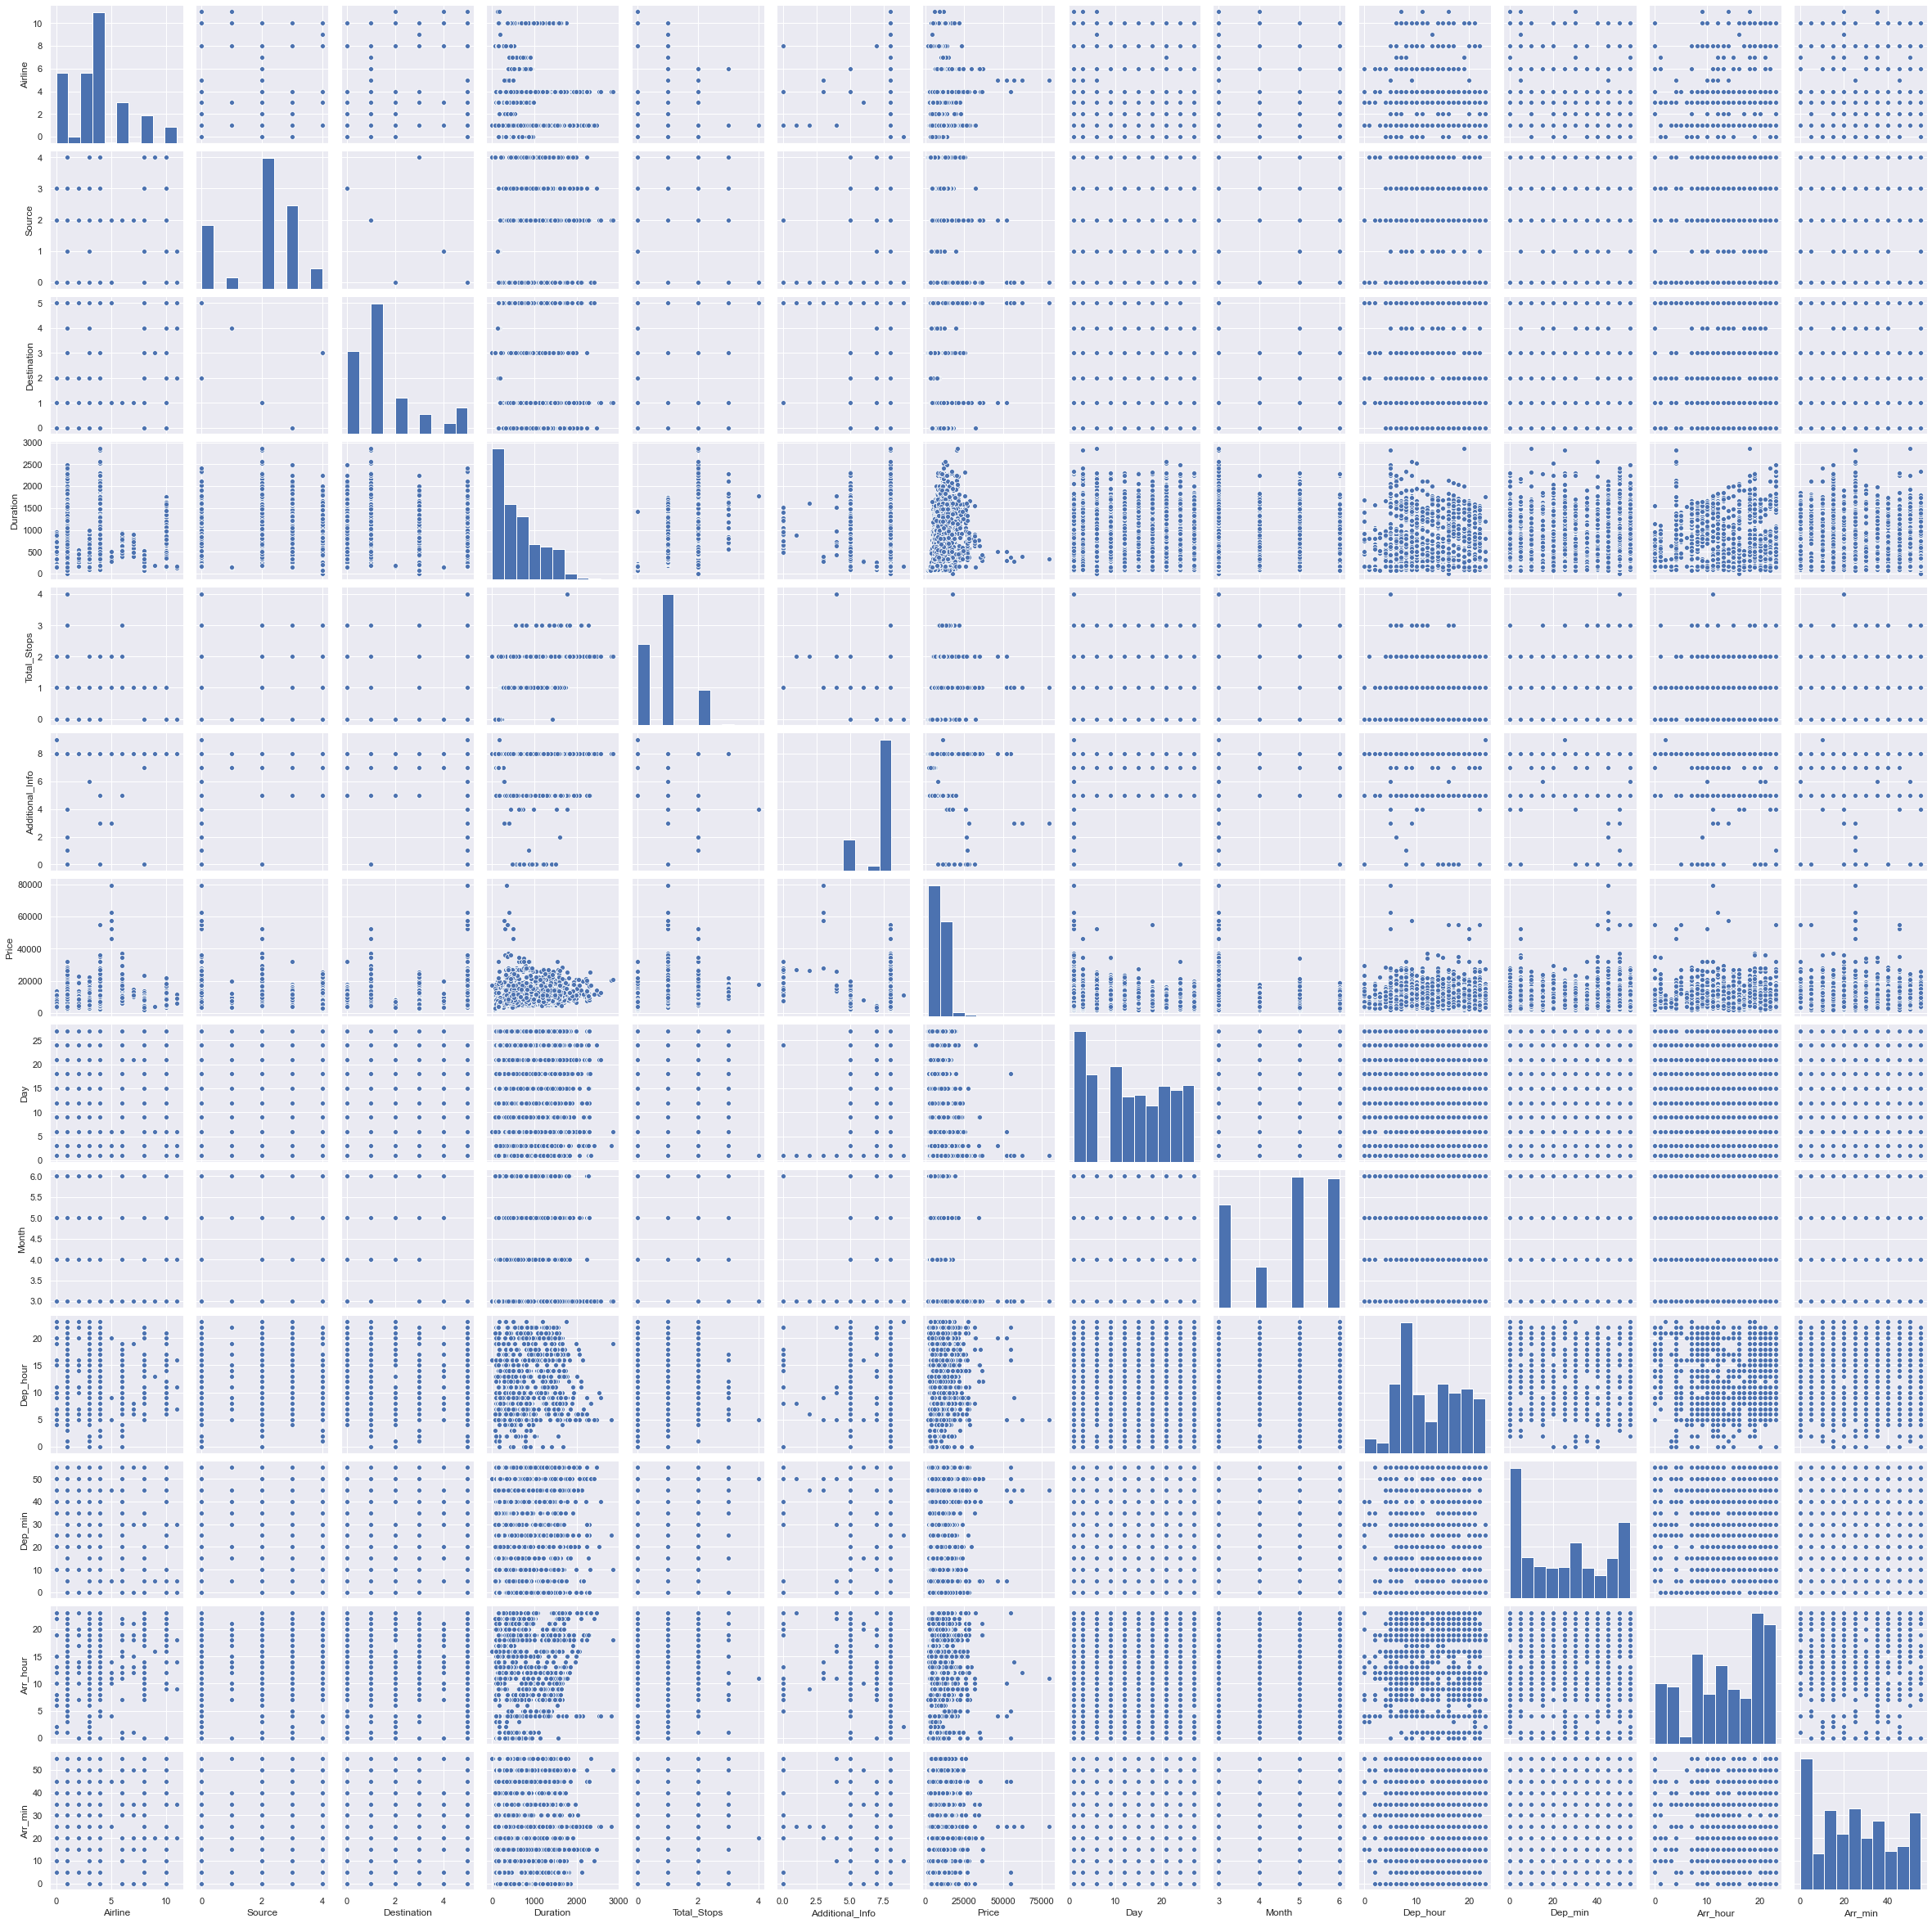

In [60]:
sns.pairplot(train)

From above we observe that the data is not skewed, but data is lavin positive relation ship but flight duration is very important and is considered vital for prices.

# Model

We were aware of target that is prices hence this is regression mdoel. We will use various regression model and will then conclude which one will best model amongst them.

In [61]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
x = train.drop("Price",axis=1)
y = train["Price"]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=22)

In [63]:
y_train

1245    15025
4698    13759
4211     9653
8410     5621
4111    13344
        ...  
4587     7673
6646    13587
5478    13044
8548    15078
6276     3841
Name: Price, Length: 8546, dtype: int64

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [65]:
pred=lm.predict(x_test)
print('Prediction :',pred)
print('Actual value ', y_test)

Prediction : [11223.24189672  4418.55968857 12559.76764695 ... 11984.73118805
  8696.75320015  9456.87132073]
Actual value  3463      6351
10470     5224
1083     12819
3102     12819
8120      6582
         ...  
9432     11410
3233     12898
5534     10478
2779     12692
5847     16079
Name: Price, Length: 2137, dtype: int64


In [66]:
print('LinearRegression')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print("r2 score is ", r2_score(y_test,pred))                                      # Evaluation Matrics
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean squared error is ',mean_squared_error(y_test,pred))
print("lm_coefficeient is", lm.coef_)
print("lm_intercept is ", lm.intercept_)
print('Lm score is ',lm.score(x_train,y_train))

LinearRegression
Mean absolute error: 2438.077017135677
r2 score is  0.4473115691370235
Root mean Squared Error: 3288.6475444459056
Mean squared error is  10815202.671590084
lm_coefficeient is [ 1.89778428e+02 -2.61820014e+02  1.49931363e+02  1.05235568e+00
  3.90277897e+03 -2.97898829e+01 -8.34771126e+01 -5.03256046e+02
  4.68548062e+01 -7.18948850e+00 -4.63387570e+00 -7.90090591e+00]
lm_intercept is  8320.530592618952
Lm score is  0.43147502653925995


In [67]:
from sklearn.model_selection  import cross_val_score as cvs
def cross_val(model_name,model,x,y,cv):
    
    scores = cvs(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')
    

In [68]:
cross_val(lm,LinearRegression(),x,y,5)

LinearRegression() Scores:
0.43
0.42
0.44
0.44
0.44
Average LinearRegression() score: 0.4328


In [69]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [70]:
predrf=RF.predict(x_test)
print('RF Prediction :',predrf)
print('Actual value ', y_test) 

RF Prediction : [ 9559.15625879  4895.76224927 14300.75291512 ... 11557.08077213
 14240.28137399 14240.28137399]
Actual value  3463      6351
10470     5224
1083     12819
3102     12819
8120      6582
         ...  
9432     11410
3233     12898
5534     10478
2779     12692
5847     16079
Name: Price, Length: 2137, dtype: int64


In [71]:
print('RandomForestRegressor')
print('RF Mean absolute error:',mean_absolute_error(y_test,predrf))
print("RF r2 score is ", r2_score(y_test,predrf))
print('RF Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('RF Mean squared error is ',mean_squared_error(y_test,predrf))

RandomForestRegressor
RF Mean absolute error: 1619.9935598939985
RF r2 score is  0.6837031640064881
RF Root mean Squared Error: 2487.852154784695
RF Mean squared error is  6189408.34406685


In [72]:
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.87
0.88
0.88
0.9
0.84
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.8748


In [73]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
#ls=Lasso(alpha=0.1) is adefault value
ls.fit(x_train,y_train)
print('Lasso Score is ',ls.score(x_train,y_train) )

Lasso Score is  0.4314750264994702


In [74]:

print('ls Mean absolute error:',mean_absolute_error(y_test,predrf))
print("ls r2 score is ", r2_score(y_test,predrf))
print('ls Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('ls Mean squared error is ',mean_squared_error(y_test,predrf))

ls Mean absolute error: 1619.9935598939985
ls r2 score is  0.6837031640064881
ls Root mean Squared Error: 2487.852154784695
ls Mean squared error is  6189408.34406685


In [75]:
cross_val(ls,Lasso(),x,y,5)

Lasso(alpha=0.01) Scores:
0.43
0.42
0.44
0.44
0.44
Average Lasso(alpha=0.01) score: 0.4328




We conclude that the linear regression is the best model hence we will perform hyper parameter tunning over it.


In [76]:
#Hyper parameter tunning

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.4s finished


In [77]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.42998843014312965
Best Params:  {'alpha': 10}


Best score after tunning is 0.42 and best parameter is 10


In [78]:
import joblib
joblib.dump(grid_result,"Flight_price_prediction.pkl")

['Flight_price_prediction.pkl']